<a href="https://colab.research.google.com/github/kaviara-14/Stock_Price_Prediction/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Description: This program uses an artifical recurrent neural network called Long Short Term Memory (LSTM)
#                     to predict the closing stock price of a corporation (Apple Inc.) using the past 60 days stock price.

In [1]:
#Import the Libraries

import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#Get the stock quote
df = web.DataReader('AAPL', data_source='yahoo', start='2018-01-01', end='2025-12-17')

#Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,43.075001,42.314999,42.540001,43.064999,102223600.0,41.310070
2018-01-03,43.637501,42.990002,43.132500,43.057499,118071600.0,41.302879
2018-01-04,43.367500,43.020000,43.134998,43.257500,89738400.0,41.494736
2018-01-05,43.842499,43.262501,43.360001,43.750000,94640000.0,41.967163
2018-01-08,43.902500,43.482498,43.587502,43.587502,82271200.0,41.811283
...,...,...,...,...,...,...
2021-05-28,125.800003,124.550003,125.570000,124.610001,71311100.0,124.610001
2021-06-01,125.349998,123.940002,125.080002,124.279999,67637100.0,124.279999
2021-06-02,125.239998,124.050003,124.279999,125.059998,59278900.0,125.059998


In [3]:
#Get the number of rows and column in the data set

df.shape

(862, 6)

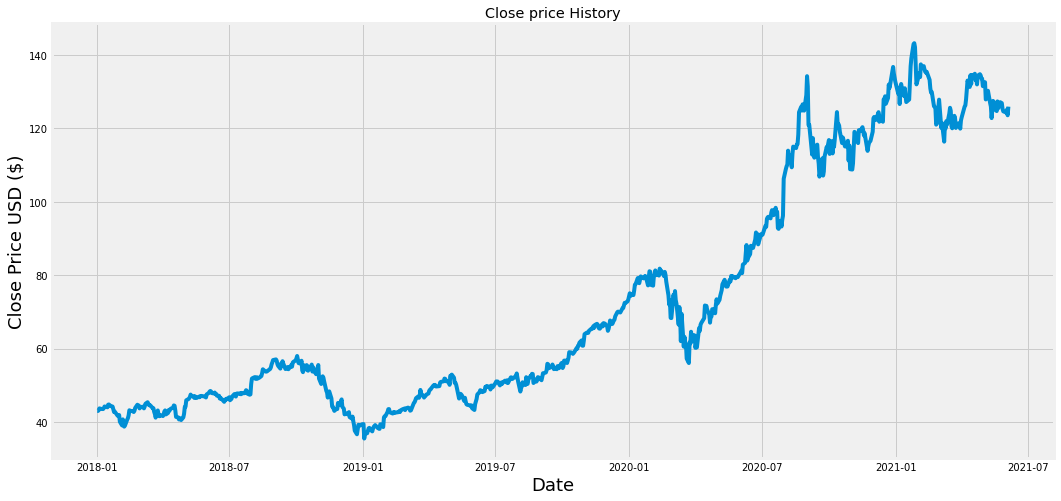

In [4]:
#Visualize the closing price history

plt.figure(figsize=(16,8))
plt.title('Close price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [5]:
#Create a new dataframe with only the 'Close column'
data = df.filter(['Close'])

#Convert the dataframe to a numpy array
dataset = data.values

#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8 )

training_data_len

690

In [6]:
#Scale the data

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.06985711],
       [0.06978741],
       [0.07164594],
       [0.07622255],
       [0.07471252],
       [0.07466604],
       [0.0745731 ],
       [0.07687303],
       [0.08107793],
       [0.0789871 ],
       [0.08574748],
       [0.08611916],
       [0.08426066],
       [0.08086885],
       [0.08096176],
       [0.0744105 ],
       [0.0671855 ],
       [0.06811474],
       [0.05986759],
       [0.05756766],
       [0.05863629],
       [0.0594494 ],
       [0.04253687],
       [0.03322105],
       [0.04841444],
       [0.04030663],
       [0.03010801],
       [0.0330352 ],
       [0.04767105],
       [0.05145776],
       [0.0584969 ],
       [0.07155303],
       [0.07025204],
       [0.06890464],
       [0.06709259],
       [0.07041467],
       [0.07738413],
       [0.08544546],
       [0.08409803],
       [0.08347077],
       [0.07622255],
       [0.07903358],
       [0.0804507 ],
       [0.08010221],
       [0.07629224],
       [0.08072947],
       [0.08779183],
       [0.091

In [7]:
#Creating the training data set
#Create the scaled training data set

train_data = scaled_data[0:training_data_len , :]

#Split the data into x_train and y_train data sets

x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.06985711, 0.06978741, 0.07164594, 0.07622255, 0.07471252,
       0.07466604, 0.0745731 , 0.07687303, 0.08107793, 0.0789871 ,
       0.08574748, 0.08611916, 0.08426066, 0.08086885, 0.08096176,
       0.0744105 , 0.0671855 , 0.06811474, 0.05986759, 0.05756766,
       0.05863629, 0.0594494 , 0.04253687, 0.03322105, 0.04841444,
       0.04030663, 0.03010801, 0.0330352 , 0.04767105, 0.05145776,
       0.0584969 , 0.07155303, 0.07025204, 0.06890464, 0.06709259,
       0.07041467, 0.07738413, 0.08544546, 0.08409803, 0.08347077,
       0.07622255, 0.07903358, 0.0804507 , 0.08010221, 0.07629224,
       0.08072947, 0.08779183, 0.09183412, 0.08776861, 0.08421419,
       0.08470203, 0.08323847, 0.0769195 , 0.07678012, 0.06755721,
       0.06193519, 0.05285167, 0.07104194, 0.06075036, 0.0564293 ])]
[0.05944940321103476]

[array([0.06985711, 0.06978741, 0.07164594, 0.07622255, 0.07471252,
       0.07466604, 0.0745731 , 0.07687303, 0.08107793, 0.0789871 ,
       0.08574748, 0.08611916, 0.08

In [9]:
#Convert the x_train and y_train to numpy arrays

x_train,y_train = np.array(x_train), np.array(y_train)


In [10]:
#Reshape the data

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],  1))
x_train.shape

(630, 60, 1)

In [11]:
#Build the LSTM network model

model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [12]:
#Compile the model

model.compile(optimizer='adam', loss='mean_squared_error')

In [13]:
#Train the model

model.fit(x_train, y_train, batch_size=1, epochs=1)

630/630 [==============================] - 31s 22ms/step - loss: 0.0031


In [14]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2003

test_data = scaled_data[training_data_len - 60: , :]

#Create the data sets x_test and y_test

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [15]:
#Convert the data to a numpy array 

x_test = np.array(x_test)

In [16]:
#Reshape the data into the shape accepted by the LSTM

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [17]:
#Getting the models predicted price values

predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)

In [19]:
#Calculate/Get the root mean squared error (RMSE)

rmse=np.sqrt( np.mean( predictions - y_test )**2 )
rmse

0.5259049881336301

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


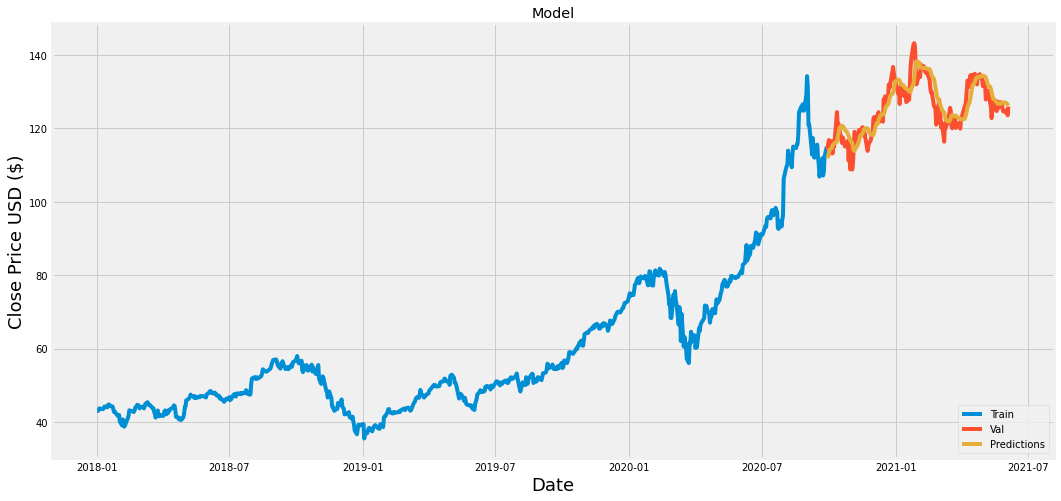

In [20]:
#Plot/Create the data for the graph

train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#Visualize the data

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [21]:
#Show the valid and predicted prices

valid

,Close,Predictions
Date,,
2020-09-29,114.089996,111.885529
2020-09-30,115.809998,112.469261
2020-10-01,116.790001,113.262901
2020-10-02,113.019997,114.183533
2020-10-05,116.500000,114.694084
...,...,...
2021-05-28,124.610001,127.049690
2021-06-01,124.279999,126.892715
2021-06-02,125.059998,126.641281


In [23]:
#Get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2018-01-01', end='2025-12-17')

#Create a new dataframe
new_df = apple_quote.filter(['Close'])

#Get teh last 60 day closing price and convert the dataframe to an array
last_60_days = new_df[-60:].values

#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

#Create an empty list
X_test = []

#Append teh past 60 days
X_test.append(last_60_days_scaled)

#Convert the X_test data set to a numpy array
X_test = np.array(X_test)

#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#Get the predicted scaled price
pred_price = model.predict(X_test)

#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)



[[126.05406]]


In [28]:
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2018-06-18', end='2024-12-18')

print(apple_quote2['Close'])

Date
2018-06-18     47.185001
2018-06-19     46.422501
2018-06-20     46.625000
2018-06-21     46.365002
2018-06-22     46.230000
                 ...    
2021-05-28    124.610001
2021-06-01    124.279999
2021-06-02    125.059998
2021-06-03    123.540001
2021-06-04    125.889999
Name: Close, Length: 747, dtype: float64
